## 🌍 **Travel and Tourism Domain**

The **travel and tourism** industry is a fast-paced sector that focuses on providing services for people traveling across domestic and international destinations. It includes airlines, hotels, and travel agencies, which rely on **data-driven insights** to optimize pricing, enhance customer experiences, and forecast demand. Accurate **flight price prediction** empowers businesses to strategize effectively and helps travelers make informed decisions about their journeys.


## ✈️ **Flight Price Prediction Project**

Predicting **flight ticket prices** using machine learning based on key factors like **departure time**, **airline**, **source**, and **destination**.  
An interactive **Streamlit app** provides real-time predictions and insightful visualizations to help users make informed decisions.


## 🎯 **Project Objective**

Build a powerful **machine learning model** to accurately **predict flight ticket prices** using factors like time, airline, and route.  
Deploy an interactive **Streamlit app** for real-time predictions, helping users make smarter travel decisions.


In [1]:
import pandas as pd

In [2]:
flight_predic_data = pd.read_csv('Flight_Price.csv')

## **Display basic information about the dataset**

In [3]:
# Display the first 5 rows

print(flight_predic_data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [4]:
# Dataset structure (columns, data types)

flight_predic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Statistical summary for numerical features

flight_predic_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# **Check for missing values**

In [6]:
# Check for missing values

flight_predic_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Check percentage of missing values

print(flight_predic_data.isnull().mean() * 100)

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64


# **Drop rows with null values**

In [8]:
flight_predic_data.dropna(inplace=True)

In [9]:
# Verifying if the null values are removed

print(flight_predic_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


### **Explanation:**
- **`dropna()`**: Removes all rows where **any** column contains missing values.  
- **`inplace=True`**: Updates the **DataFrame** directly without creating a copy.  
- **`isnull().sum()`**: Used to verify that **no missing values** remain after cleaning.  

# **Handle Duplicate Records**

In [10]:
# Find duplicates.

print(flight_predic_data.duplicated().sum())

220


# ***Step 1.***
- check for exact duplicate

In [11]:
flight_predic_data[flight_predic_data.duplicated(keep=False)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
73,Jet Airways,24/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
81,Jet Airways,24/03/2019,Banglore,New Delhi,BLR ? DEL,19:55,22:35,2h 40m,non-stop,No info,7229
87,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,04:25 07 Jun,18h 45m,2 stops,No info,13014
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [12]:
# view first 10 duplicated rows sorted by columns.

flight_predic_data[flight_predic_data.duplicated(keep=False)].sort_values(by=flight_predic_data.columns.tolist()).head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6321,Air India,01/03/2019,Banglore,New Delhi,BLR ? BOM ? AMD ? DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
9848,Air India,01/03/2019,Banglore,New Delhi,BLR ? BOM ? AMD ? DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
572,Air India,03/03/2019,Banglore,New Delhi,BLR ? DEL,21:10,23:55,2h 45m,non-stop,No info,7591
8168,Air India,03/03/2019,Banglore,New Delhi,BLR ? DEL,21:10,23:55,2h 45m,non-stop,No info,7591
1495,Air India,1/04/2019,Kolkata,Banglore,CCU ? DEL ? COK ? BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
9913,Air India,1/04/2019,Kolkata,Banglore,CCU ? DEL ? COK ? BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
4603,Air India,1/05/2019,Kolkata,Banglore,CCU ? DEL ? COK ? BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164
5042,Air India,1/05/2019,Kolkata,Banglore,CCU ? DEL ? COK ? BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164
6377,Air India,1/05/2019,Kolkata,Banglore,CCU ? DEL ? COK ? BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164
3598,Air India,1/05/2019,Kolkata,Banglore,CCU ? GAU ? DEL ? BLR,09:50,08:55 02 May,23h 5m,2 stops,No info,13227


###  **Observation:**
The dataset contains **duplicate records** where data is repeated across multiple columns.  

###  **Approach:**
To ensure data integrity and avoid redundancy, we will **retain only the first occurrence** of each duplicate row in the DataFrame.  


In [13]:
flight_predic_data.drop_duplicates(subset=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route','Dep_Time',
                                           'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'], keep='first', inplace=True)

In [14]:
flight_predic_data.shape

(10462, 11)

In [15]:
flight_predic_data.duplicated().sum()

np.int64(0)

### **Conclusion:**
- The original dataset contained **10,683 rows** and **11 columns**.  
- After **removing duplicate records** while keeping the **first occurrence**, the dataset was reduced to **10,462 rows**, preserving **11 columns**.  
- This process removed **221 duplicate entries**, ensuring **data consistency** and **improving model accuracy** by eliminating redundancy.  


# **Feature Extraction: Transforming Date & Time Attributes**  

To enhance our analysis, we extract meaningful insights from the **Date_of_Journey, Dep_Time, Arrival_Time, and Duration** columns.  
These transformations help in understanding **seasonal trends, peak hours, delays, and time-based pricing variations**.  

---

## **1. Extracting Day and Month from `Date_of_Journey`**  
The **day of the month** and **month** provide insights into seasonal demand fluctuations, holidays, and special events affecting flight prices. 

##  **2. Extracting `Departure` and `Arrival` Time Features**  

Flight schedules significantly impact ticket prices. To capture this effect, we extract the **hour and minute** from both **departure** and **arrival times**. This transformation helps in analyzing peak hours, delays, and time-based pricing trends.  


###  **Approach:**  
- Convert `Date_of_Journey` to **datetime format**.  
- Extract **day** and **month** for trend analysis.  
- Remove the original column after transformation.  

###  **Approach:**  
- Convert `Dep_Time` and `Arrival_Time` to **datetime format**.  
- Extract **hour** and **minute** separately for better granularity.  
- Remove the original columns as they are no longer needed.


In [16]:
# Conver to datetime format

flight_predic_data['Date_of_Journey'] = pd.to_datetime(flight_predic_data['Date_of_Journey'], format = '%d/%m/%Y')

In [17]:
# Extract day and month from Date_of_Journey

flight_predic_data['Journey_day'] = flight_predic_data['Date_of_Journey'].dt.day
flight_predic_data['Journey_month'] = flight_predic_data['Date_of_Journey'].dt.month

In [18]:
# Drop original column

flight_predic_data.drop('Date_of_Journey', axis=1, inplace=True)

In [19]:
flight_predic_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# ***`To dispaly the maximum number of columns in DataFrame`***

In [20]:
pd.set_option('display.max_columns', 150)

In [21]:
# Convert datetime format and Extract Dep_hour and Dep_min from Dep_Time.

flight_predic_data['Dep_hour'] = pd.to_datetime(flight_predic_data['Dep_Time']).dt.hour
flight_predic_data['Dep_min'] = pd.to_datetime(flight_predic_data['Dep_Time']).dt.minute

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\1433286330.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_predic_data['Dep_hour'] = pd.to_datetime(flight_predic_data['Dep_Time']).dt.hour
C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\1433286330.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_predic_data['Dep_min'] = pd.to_datetime(flight_predic_data['Dep_Time']).dt.minute


In [22]:
# Drop original column

flight_predic_data.drop('Dep_Time', axis = 1, inplace= True)

In [23]:
flight_predic_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [24]:
# convert to datetime format and extract the Arrival_hour and Arrival_min from Arrival_Time.

flight_predic_data['Arrival_hour'] = pd.to_datetime(flight_predic_data['Arrival_Time']).dt.hour
flight_predic_data['Arrival_min'] = pd.to_datetime(flight_predic_data['Arrival_Time']).dt.minute


C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\3185219080.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_predic_data['Arrival_hour'] = pd.to_datetime(flight_predic_data['Arrival_Time']).dt.hour
C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\3185219080.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_predic_data['Arrival_min'] = pd.to_datetime(flight_predic_data['Arrival_Time']).dt.minute


In [25]:
# drop original column 

flight_predic_data.drop('Arrival_Time', axis = 1, inplace= True)

In [26]:
flight_predic_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## **3. Extracting Duration Features**  

The `Duration` column provides insights into **flight length**, which can significantly impact pricing. Longer flights, layovers, and direct routes all contribute to price variations.  

###  **Approach:**  
- Extract **hours** and **minutes** separately from `Duration`.  
- Convert them into **numeric values** for better analysis.  
- Handle missing values (if any flights have only hours or only minutes).  
- Create a new **Total Duration (in minutes)** feature.  
- Remove the original column after transformation. 


In [27]:
flight_predic_data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [28]:
# Function to convert Duration to Total_minutes
def convert_to_total_minutes(duration):
    hours, minutes = 0, 0 # Default values
    
    # if 'h' is present extract hours
    if 'h' in duration:
        hours = int(duration.split('h')[0]) # Extract numbers before 'h'
        
        
    # if 'm' is present extract minutes
    if 'm' in duration:
      minutes_part = duration.split('h')[-1] # Get the part after 'h' if it exists.
      minutes = int(minutes_part.replace('m', '').strip()) if minutes_part.strip() else 0
      
    # Total minutes calculation
    return (hours * 60) + minutes


# Apply the function to the 'Duration' column

flight_predic_data['Duration_min'] = flight_predic_data['Duration'].apply(convert_to_total_minutes)


# Drop original column

flight_predic_data.drop('Duration', axis = 1, inplace = True)

In [29]:
flight_predic_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,285


## **Conclusion: Transforming Flight Duration to Total Minutes**  

We successfully **transformed** the `Duration` column into a more **structured numerical format** by converting flight durations into **total minutes**.  

### **Key Takeaways:**  
The function **extracts hours and minutes** separately from `Duration`.  
If **hours (`h`) are present**, they are converted into minutes.  
If **minutes (`m`) are present**, they are extracted and added to the total.  
The **new feature `Duration_min`** represents the entire flight duration in minutes.  
The **original `Duration` column** has been removed to maintain data consistency.  

### **Why is this transformation important?**  
**Enhances model performance** – Machine learning models work best with **numeric features**.  
**Improves trend analysis** – Helps in analyzing how **flight duration impacts ticket pricing**.  
**Eliminates inconsistencies** – Some flights had only hours or only minutes; now, we have a **standardized feature**.  

---

**Final Outcome:**  
We now have a **clean and structured `Duration_min` feature**, which will be valuable for our **Exploratory Data Analysis (EDA)** and **Machine Learning Model Training**.


## Dropping `Route` and `Additional_Info` Columns

### **Reason for Dropping the `Route` Column**
- The `Route` column contains information about the flight path, including layovers.  
- However, the `Total_Stops` column already provides the same information in a more concise and structured manner.  
- Keeping both columns may introduce redundancy, leading to unnecessary complexity without adding value to the model.  

### **Reason for Dropping the `Additional_Info` Column**
- The `Additional_Info` column mostly contains generic values such as "No info" in a majority of rows.  
- The remaining unique values are sparse and do not provide significant predictive power.  
- Removing this column helps reduce noise in the dataset and improves model efficiency.  

In [30]:
flight_predic_data.drop(columns=['Route', 'Additional_Info'], axis=1, inplace=True)

In [31]:
flight_predic_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,285


In [32]:
flight_predic_data.dtypes

Airline          object
Source           object
Destination      object
Total_Stops      object
Price             int64
Journey_day       int32
Journey_month     int32
Dep_hour          int32
Dep_min           int32
Arrival_hour      int32
Arrival_min       int32
Duration_min      int64
dtype: object

# Exploratory Data Analysis (EDA)

EDA helps in understanding the dataset better by analyzing patterns, relationships, and distributions of variables.


In [33]:
flight_predic_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,285


## **Univariate Analysis**

### **Categorical Features**
- **Features:** `Airline`, `Source`, `Destination`, `Total_Stops`
- **Visualization:** Countplot

In [34]:
# check the unique values of categorical features.

print(flight_predic_data['Airline'].unique())
print(flight_predic_data['Source'].unique())
print(flight_predic_data['Destination'].unique())
print(flight_predic_data['Total_Stops'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']


# Observation: Destination Column Discrepancy 

---

## Issue Identified
- The **Destination** column contains two values that likely refer to the same city:
  - `'New Delhi'`
  - `'Delhi'`
- This inconsistency can lead to **incorrect analysis** or **duplicate entries** when grouping or aggregating data.

---

## Impact on Analysis 
1. **Data Integrity**:
   - The presence of both `'New Delhi'` and `'Delhi'` can skew results when analyzing flight prices, routes, or demand for Delhi.
2. **Modeling Issues**:
   - Machine learning models may treat `'New Delhi'` and `'Delhi'` as separate categories, leading to **redundant features** and **reduced model accuracy**.

In [35]:
flight_predic_data['Destination'] = flight_predic_data['Destination'].replace('New Delhi', 'Delhi')

In [36]:
flight_predic_data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\26665528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_predic_data, x=col, palette='viridis')


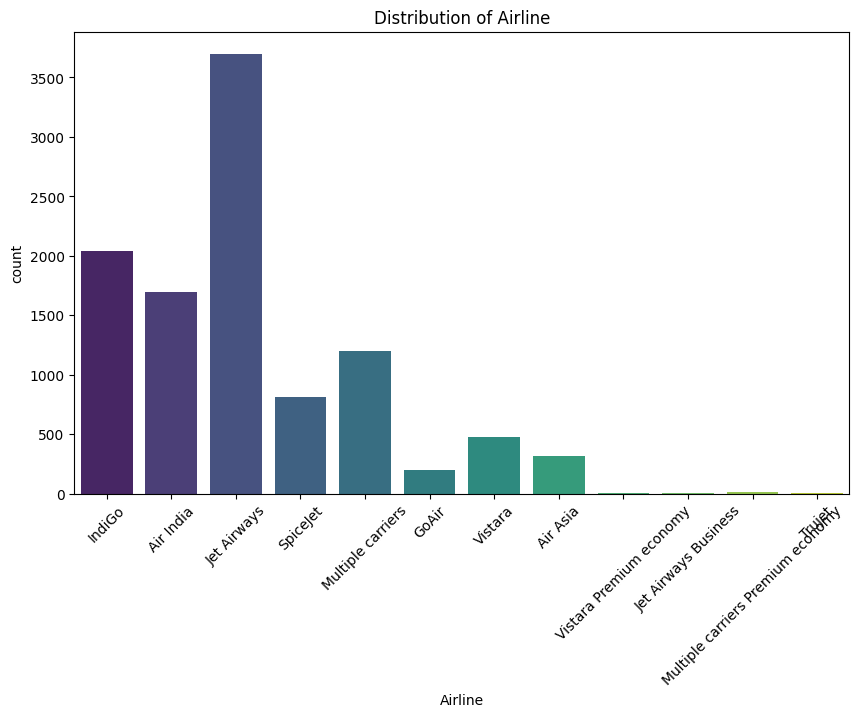

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\26665528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_predic_data, x=col, palette='viridis')


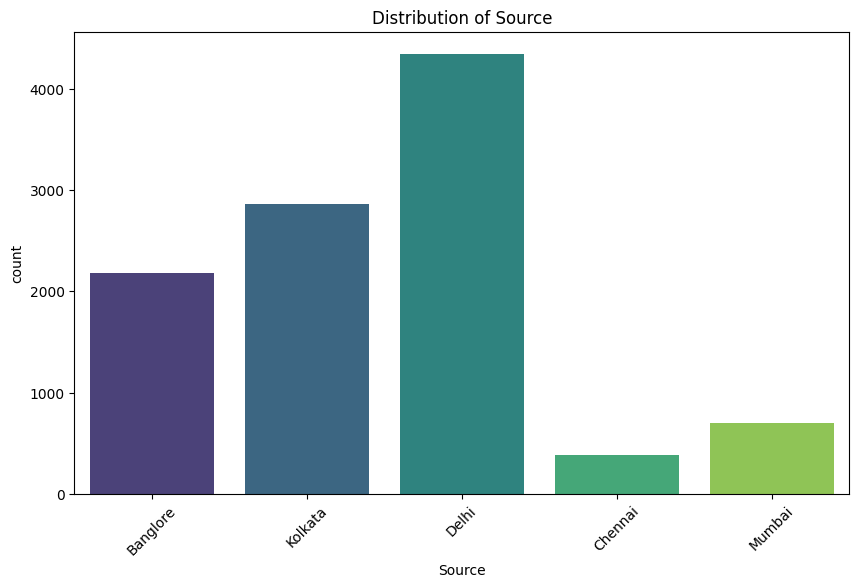

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\26665528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_predic_data, x=col, palette='viridis')


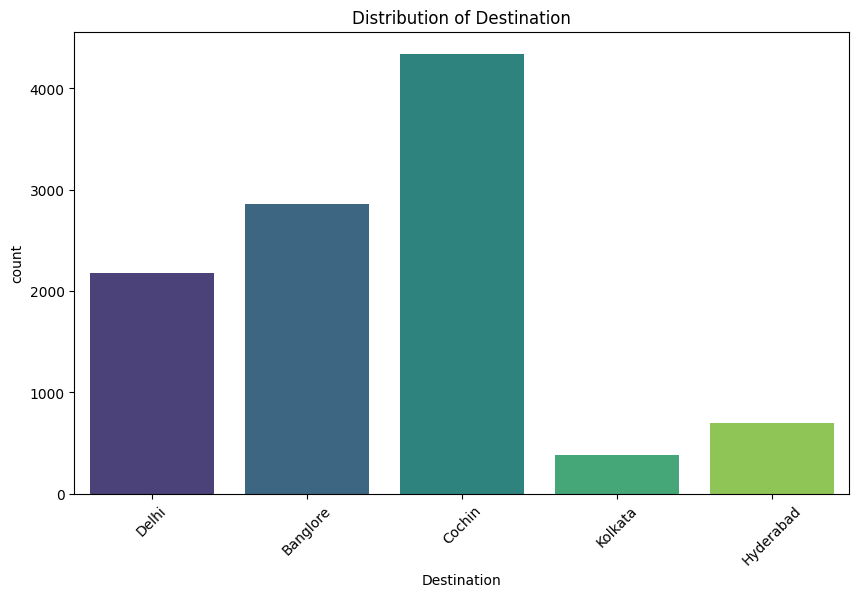

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\26665528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_predic_data, x=col, palette='viridis')


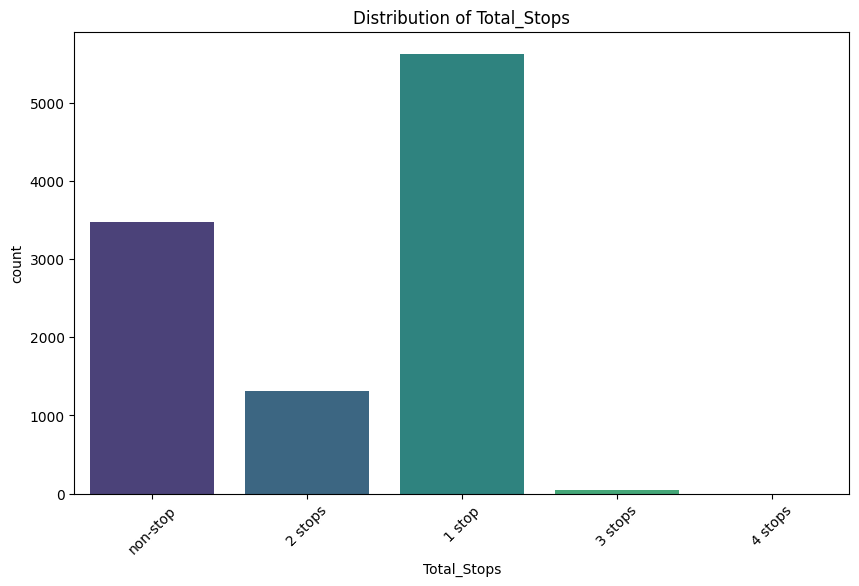

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Airline', 'Source', 'Destination', 'Total_Stops']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=flight_predic_data, x=col, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


### **Numerical Features**
- **Features:** `Price`, `Journey_day`, `Journey_month`, `Dep_hour`, `Dep_min`, `Arrival_hour`, `Arrival_min`, `Duration_min`
- **Visualization:** Histogram, Boxplot

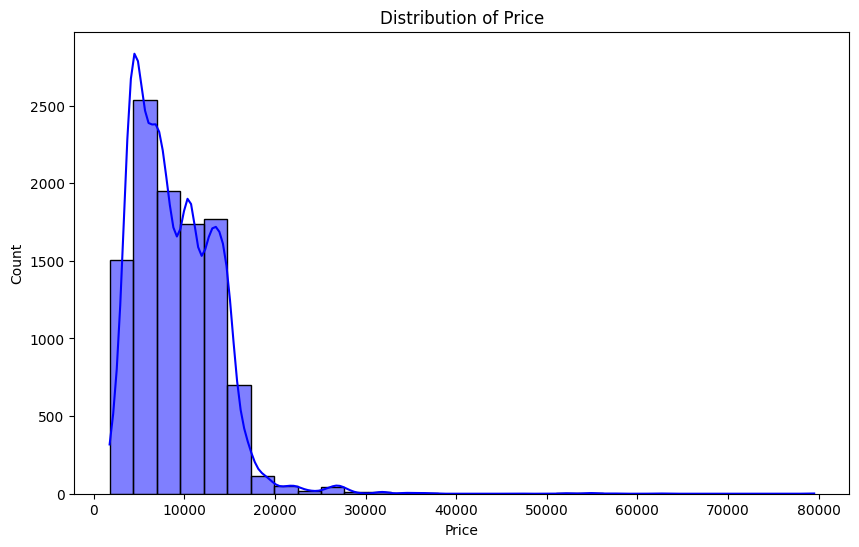

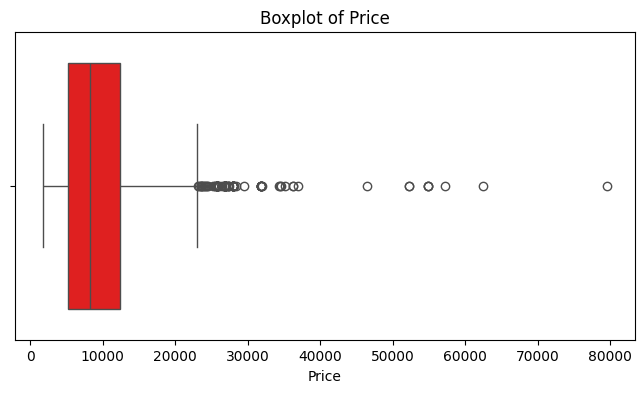

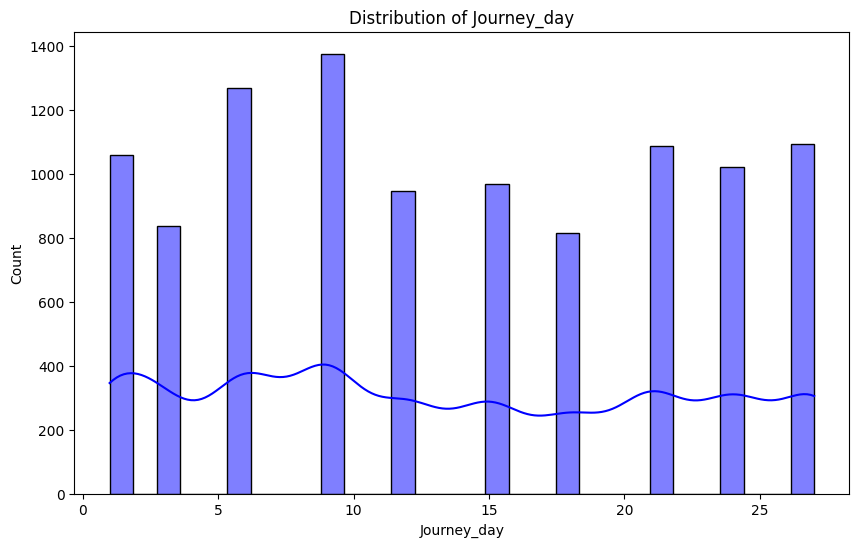

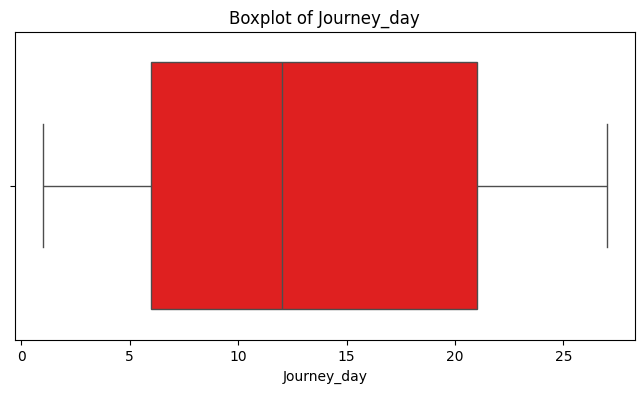

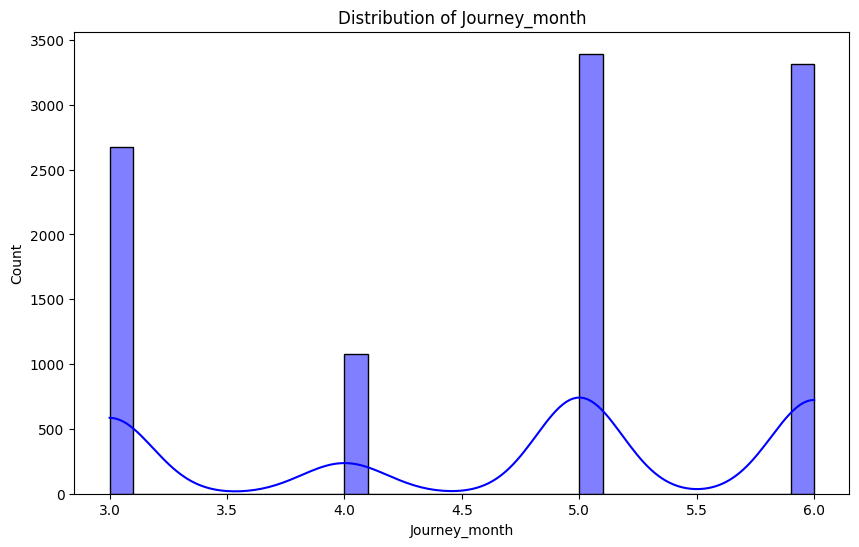

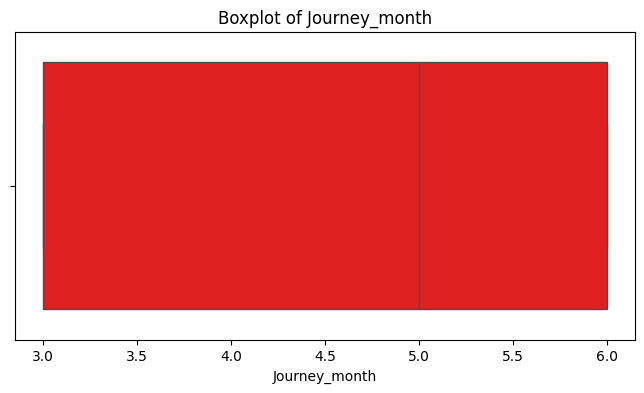

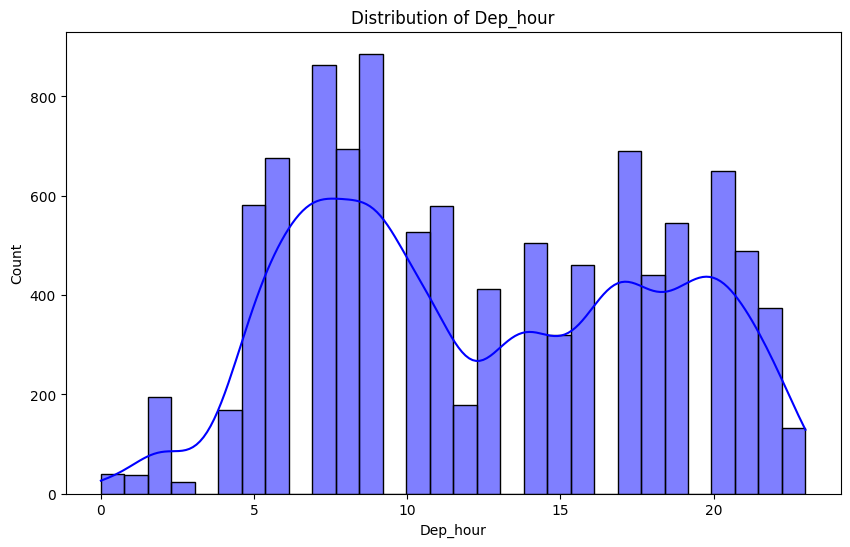

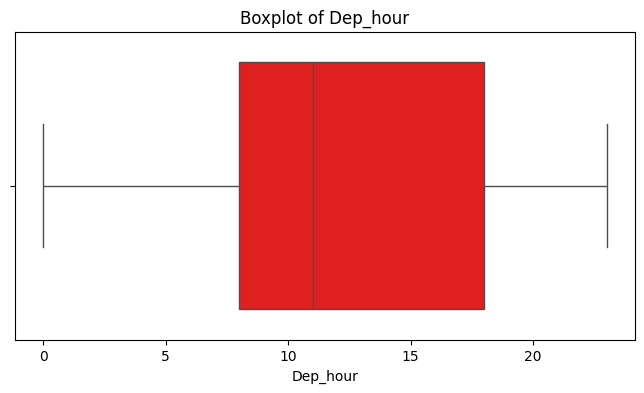

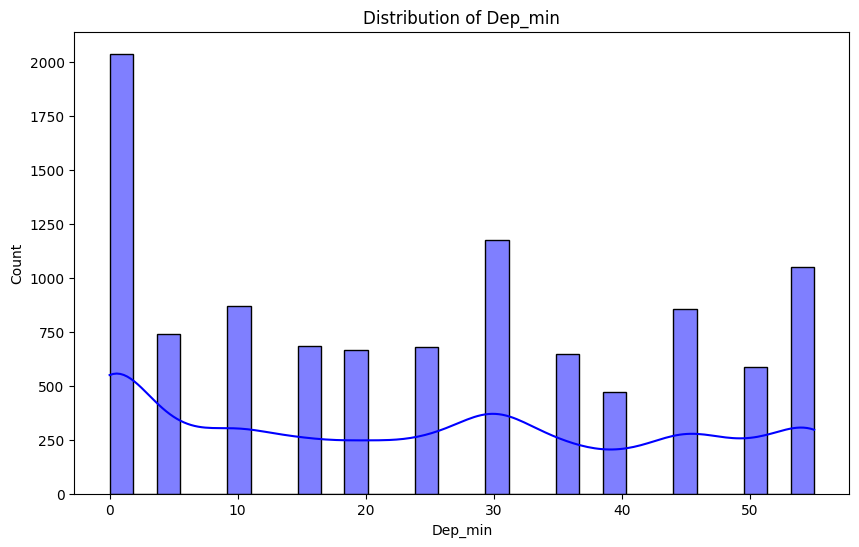

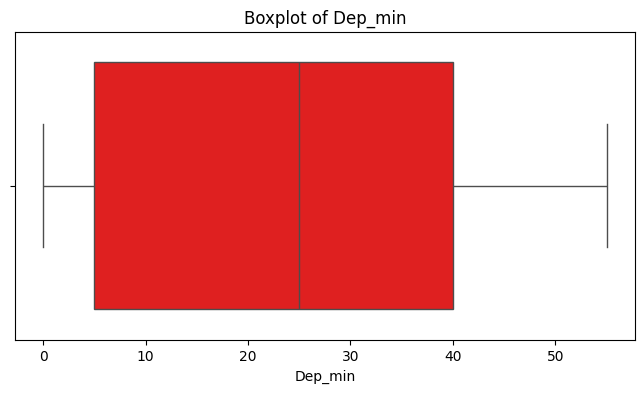

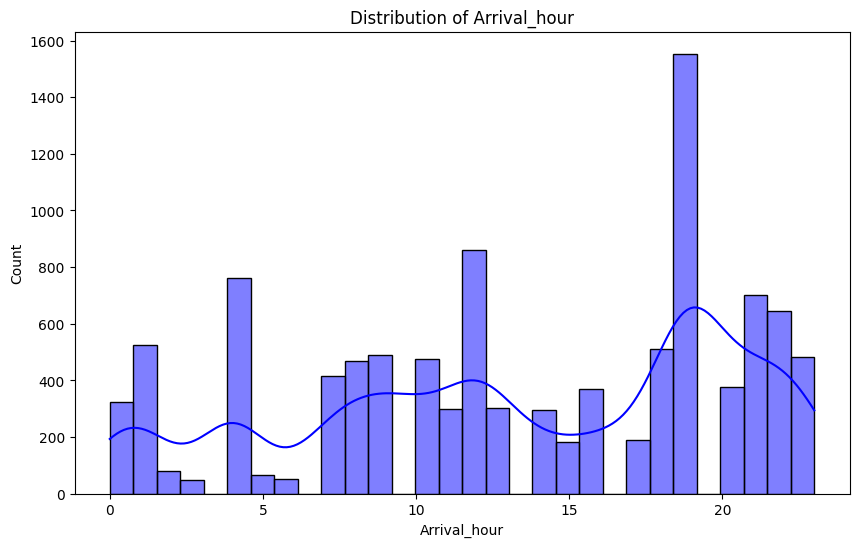

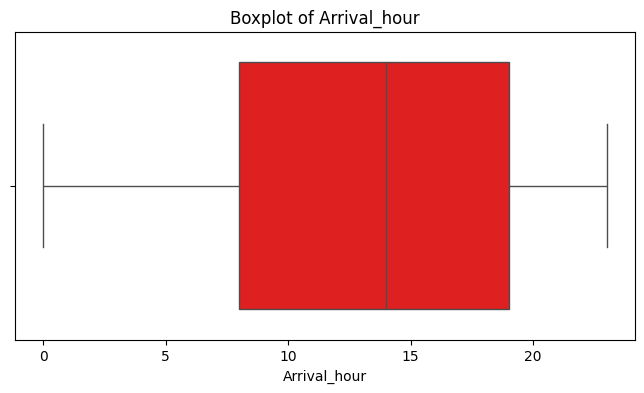

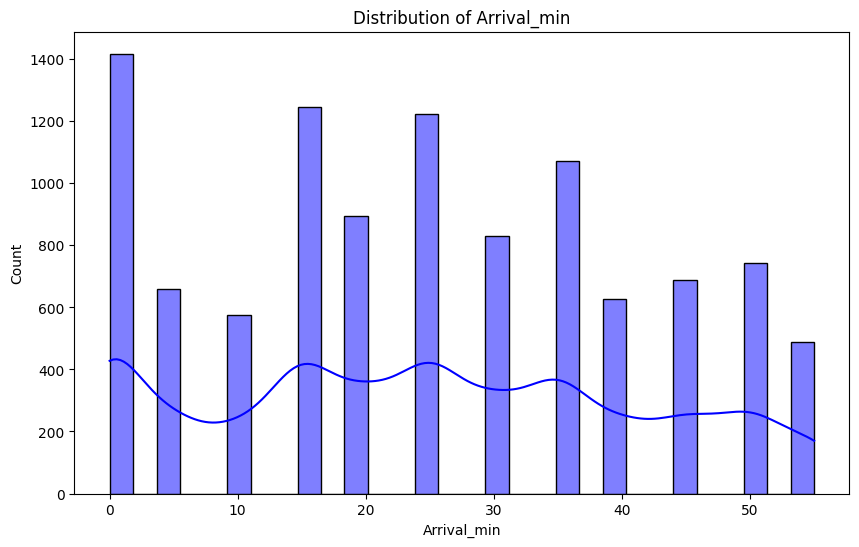

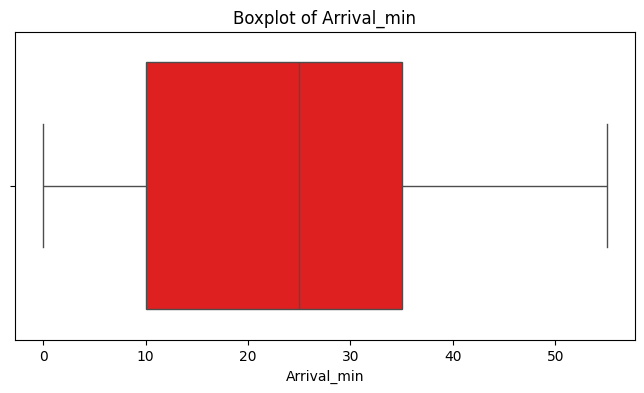

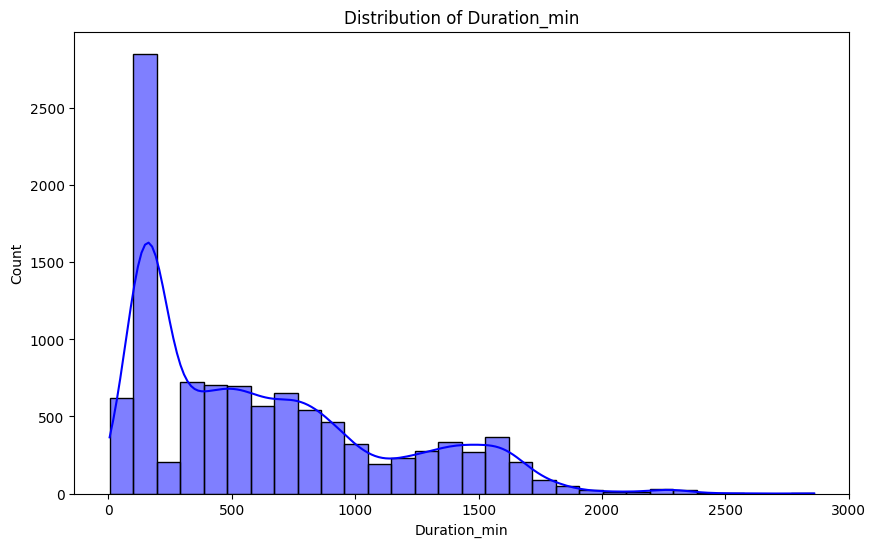

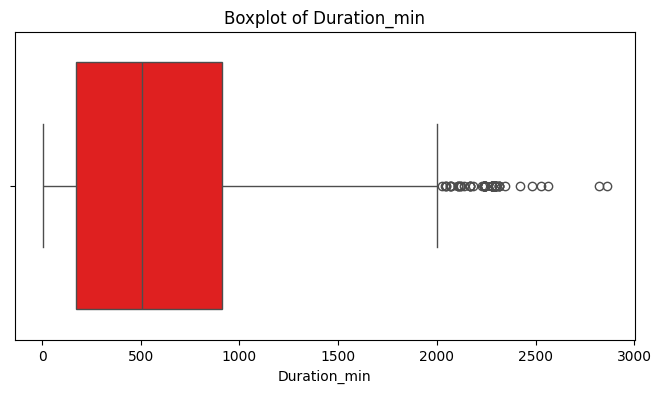

In [38]:
numerical_cols = ['Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 
                  'Arrival_hour', 'Arrival_min', 'Duration_min']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(flight_predic_data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=flight_predic_data[col], color="red")
    plt.title(f"Boxplot of {col}")
    plt.show()


### Key Takeaways from Univariate Analysis

1. **Journey Month**:
   - Most journeys occur between months **3.0 and 6.0**, with a peak around month **5.0**.

2. **Journey Day**:
   - Travel activity is relatively evenly distributed, with slight peaks around the **10th and 20th** days.

3. **Airline Distribution**:
   - **Air India** and **Jet Airways** are the most frequent airlines.
   - Other notable airlines include **SpiceJet**, **Multiple carriers**, and **IndiGo**.

4. **Price Distribution**:-
   - Prices are **right-skewed**, with most tickets priced below **INR 20,000**.
   - A few high-cost outliers exist, reaching up to **INR 80,000**.

5. **Destination**:
   - Most common destinations: **Bangalore**, **Cochin**, and **Kolkata**.
   - **Hyderabad** has fewer flights compared to others.

6. **Source**:
   - Primary flight sources: **Delhi**, **Mumbai**, and **Bangalore**.
   - **Chennai** and **Kolkata** have fewer originating flights.

7. **Total Stops**:
   - Majority of flights are **non-stop**, followed by **1-stop** flights.
   - Flights with **2 or more stops** are less common.

8. **Departure Time**:
   - Departure hours are concentrated around **15:00** and **20:00**.
   - Departure minutes are evenly distributed, with slight peaks at **10** and **40** minutes.

9. **Arrival Time**:
   - Arrival hours are concentrated around **5:00**, **10:00**, and **15:00**.
   - Arrival minutes are evenly distributed, with slight peaks at **10** and **40** minutes.

10. **Flight Duration**:
    - Most flights last less than **500 minutes**.
    - A few long-duration flights extend up to **3000 minutes**.

11. **Outliers**:
    - **Price** and **Duration** distributions show significant outliers, indicating some high-cost and long-duration flights.

---

### Summary:
- **Travel Trends**: Peak travel occurs in mid-months (10th, 20th) and around month 5.0.
- **Popular Airlines**: Air India and Jet Airways dominate the market.
- **Price & Duration**: Most flights are affordable and short-duration, with some exceptions.
- **Routes**: Bangalore, Delhi, and Mumbai are key hubs for both departures and arrivals.

## **2️⃣ Bivariate Analysis**

### **Categorical vs Numerical**
- **Analysis:** Impact of categorical features on `Price`
- **Visualization:** Boxplot

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\3132843881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=flight_predic_data, x=col, y="Price", palette="coolwarm")


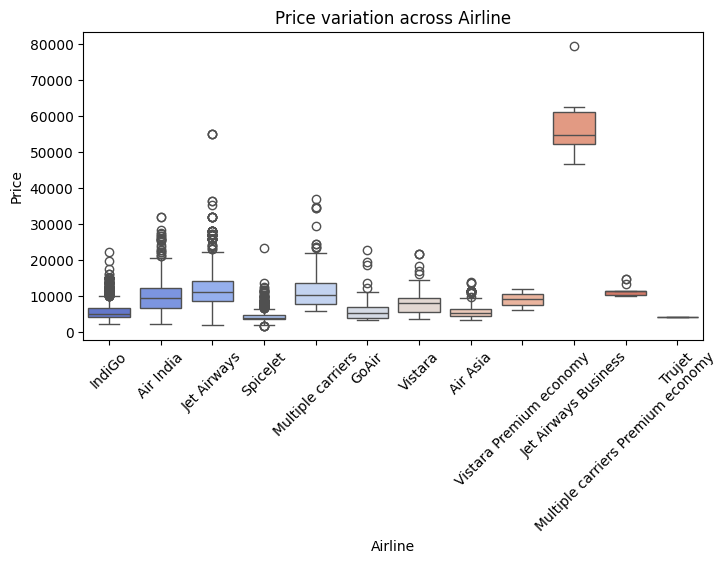

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\3132843881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=flight_predic_data, x=col, y="Price", palette="coolwarm")


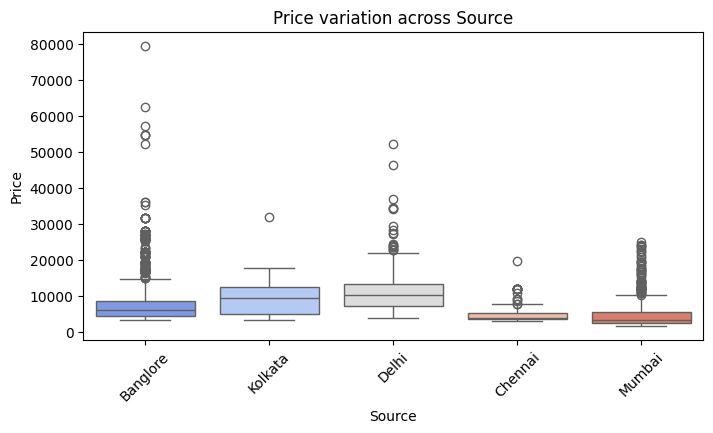

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\3132843881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=flight_predic_data, x=col, y="Price", palette="coolwarm")


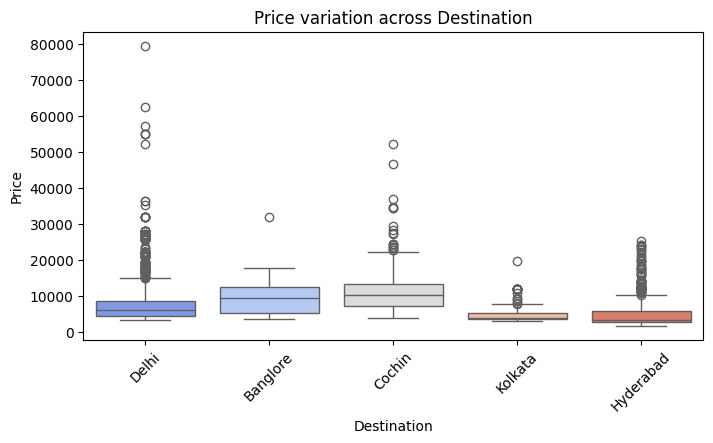

C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\3132843881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=flight_predic_data, x=col, y="Price", palette="coolwarm")


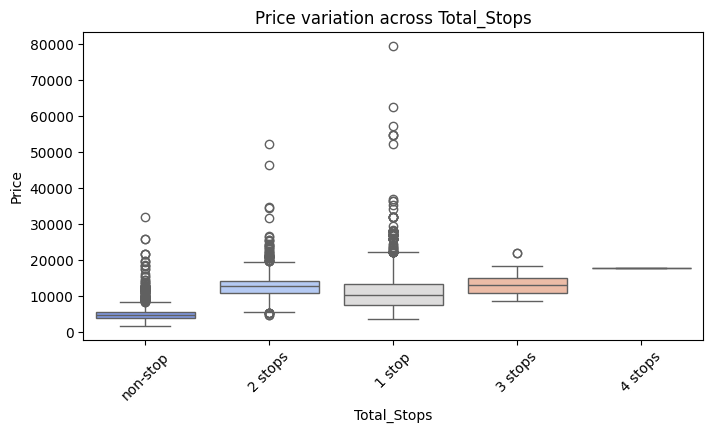

In [39]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=flight_predic_data, x=col, y="Price", palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Price variation across {col}")
    plt.show()

### Key Takeaways from Bivariate Analysis

1. **Price Variation Across Airlines**:
   - **Air India** and **Jet Airways** tend to have higher ticket prices compared to other airlines.
   - Budget airlines like **Air Asia** and **GoAir** generally offer lower-priced tickets.
   - **Jet Airways Business** and **Multiple carriers Premium economy** have significantly higher prices, indicating premium services.

2. **Price Variation Across Source**:
   - Flights originating from **Delhi** and **Mumbai** tend to have higher prices.
   - **Bangalore** and **Chennai** show moderate pricing, while **Kolkata** has relatively lower prices.

3. **Price Variation Across Destination**:
   - Flights to **Cochin** and **Hyderabad** tend to be more expensive compared to other destinations.
   - **Bangalore** and **Kolkata** show moderate pricing, with **Kolkata** being slightly cheaper.

4. **Price Variation Across Total Stops**:
   - **Non-stop** flights are generally more expensive than flights with stops.
   - Flights with **1 stop** are moderately priced, while flights with **2 or more stops** tend to be cheaper.
   - The price decreases as the number of stops increases, indicating a trade-off between convenience and cost.

---

### Summary:
- **Airlines**: Premium and full-service airlines like Air India and Jet Airways charge higher prices, while budget airlines offer more affordable options.
- **Source & Destination**: Major hubs like Delhi and Mumbai have higher prices, while smaller cities like Kolkata offer cheaper flights.
- **Total Stops**: Non-stop flights are the most expensive, while increasing the number of stops reduces the ticket price.

### **🔹 Numerical vs Numerical**
- **Analysis:** Correlation between numerical features
- **Visualization:** Scatterplot, Heatmap

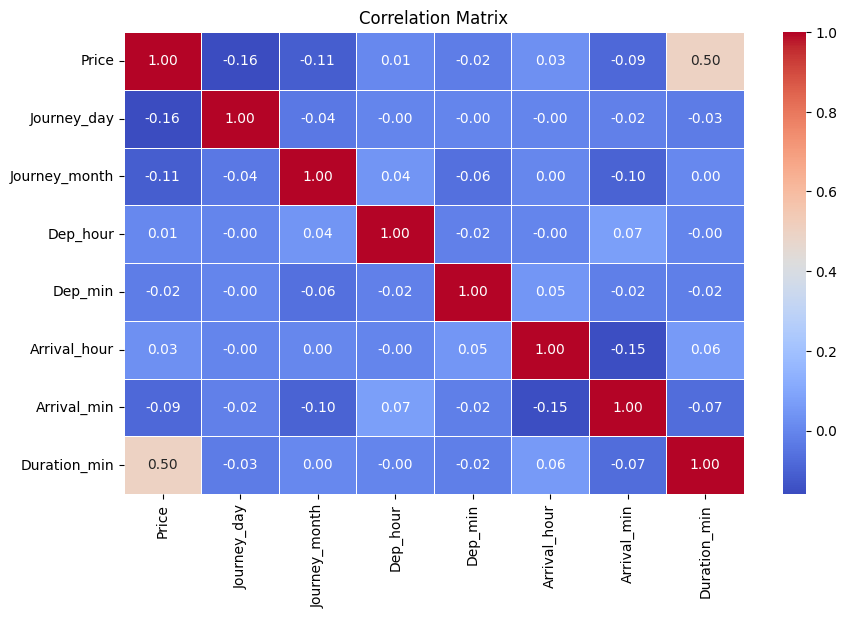

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(flight_predic_data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Flight Price Prediction - Correlation Matrix

## What is a Correlation Matrix?  
A **correlation matrix** helps us understand **how different numerical features relate** to each other in our dataset.  
- Values range from **-1 to 1**:  
  - **1** → Strong positive correlation (when one increases, the other increases).  
  - **0** → No correlation.  
  - **-1** → Strong negative correlation (when one increases, the other decreases).  
- The **color** in the heatmap shows the strength of the correlation.

## Key Observations

### **Price vs Duration**
- **Correlation: 0.50 (Moderate Positive)**
- As **flight duration** increases, the **price also tends to increase**.  
- **Longer flights** usually cost **more money**.

### **Price vs Journey Day & Month**
- **Journey_day (-0.16) and Journey_month (-0.11)**
- Weak negative correlation means **the date of travel slightly affects ticket price**, but not strongly.  
- This could mean **flights are priced similarly throughout the year**, with some seasonal effects.

### **Departure & Arrival Time**
- **Dep_hour (0.01) & Arrival_hour (0.03)** → Almost **no correlation** with price.  
- **Dep_min (-0.02) & Arrival_min (-0.09)** → **No strong impact** on price.  
- This means **departure and arrival time do not significantly affect flight prices**.

### **Duration vs Price**
- **Duration_min (0.50)** → **The most important feature affecting price**.
- **Longer flight duration = Higher price**.

## **Conclusion**
- The **most important feature impacting price** is **flight duration**.  
- **Time of journey (hour/minute) does not strongly affect price**.  
- The **day or month of travel has some small effect on price**, but it's not the biggest factor.  


## **3️ Multivariate Analysis (Multiple Variables)**
- Examines relationships between multiple features.

### **Pairplot**
- Shows interactions among numerical features.

## **Pairplot for Numerical Features**

In [41]:
flight_predic_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,285


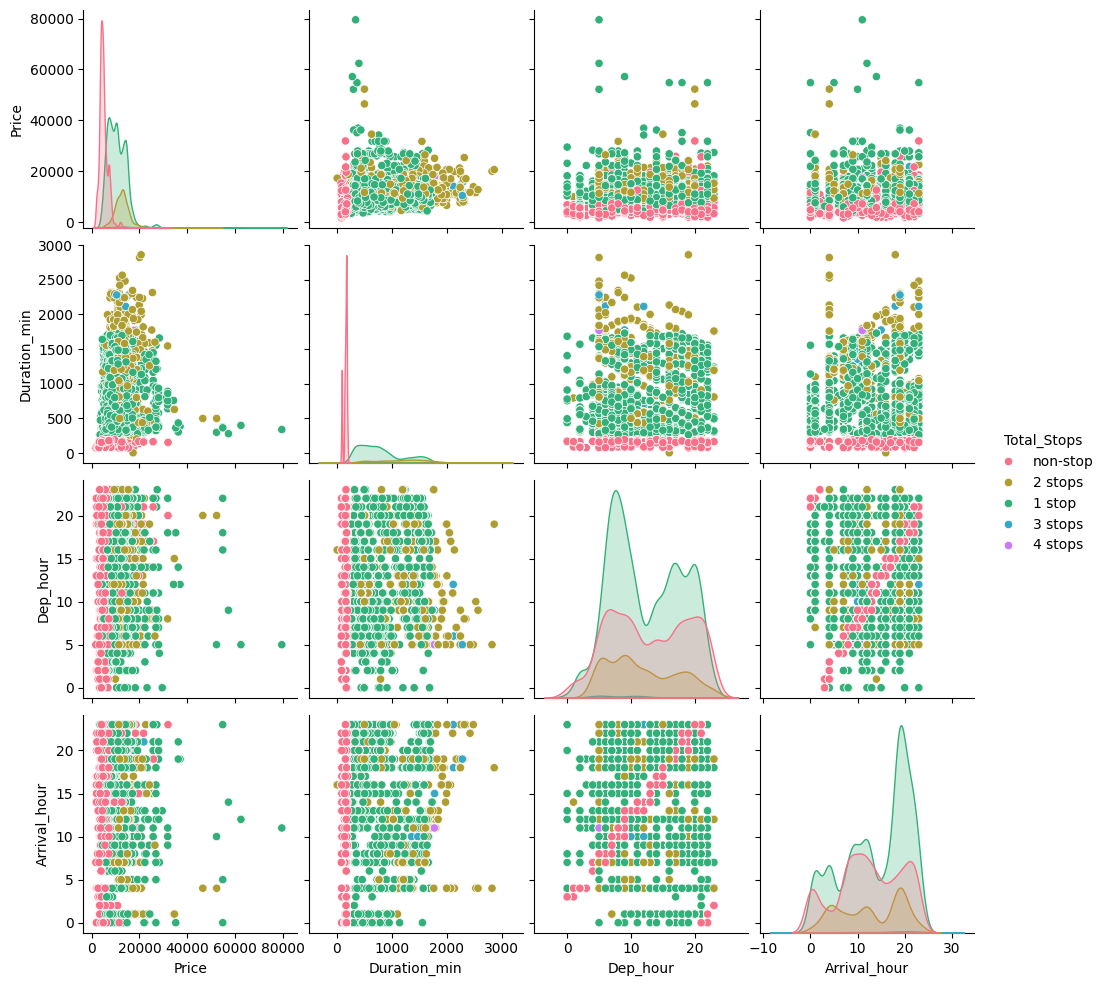

In [42]:
import seaborn as sns

selected_features = ['Price', 'Duration_min', 'Dep_hour', 'Arrival_hour', 'Total_Stops']
sns.pairplot(flight_predic_data[selected_features], diag_kind="kde", hue="Total_Stops", palette="husl")
plt.show()


# Flight Price Prediction - Pairplot Analysis

## What is a Pairplot?
A **pairplot** is a way to visualize **relationships between multiple numerical features** in a dataset.  
- Each dot represents a flight.  
- Different **colors** indicate different **numbers of stops** in the flight (e.g., non-stop, 1 stop, 2 stops, etc.).
- The **diagonal plots** show **distributions (density) of each feature**.

## Key Observations

### 1️ **Price vs Duration**
- Flights with **longer durations tend to be more expensive**.  
- Some flights with very **high prices (~80,000) are extreme cases** (outliers).

### 2️ **Price vs Number of Stops**
- **Non-stop flights (pink) are mostly cheaper** compared to **flights with multiple stops**.  
- **More stops (e.g., 3-4 stops) often result in higher prices**.

### 3️ **Departure Hour & Arrival Hour**
- Flights depart and arrive at **different times throughout the day**.
- The pattern shows **flights tend to be scheduled in certain time slots** (e.g., early morning or late evening).

### 4️ **Duration vs Stops**
- **Non-stop flights have the shortest duration**.  
- **More stops = longer flight duration**.

## **Conclusion**
- **Flight duration and number of stops are important factors in price prediction**.  
- **Non-stop flights are cheaper and faster**.  
- **More expensive flights tend to have multiple stops or longer durations**.  


### **🔹 Price vs Duration & Total Stops**
- Examines how flight duration and number of stops affect price.

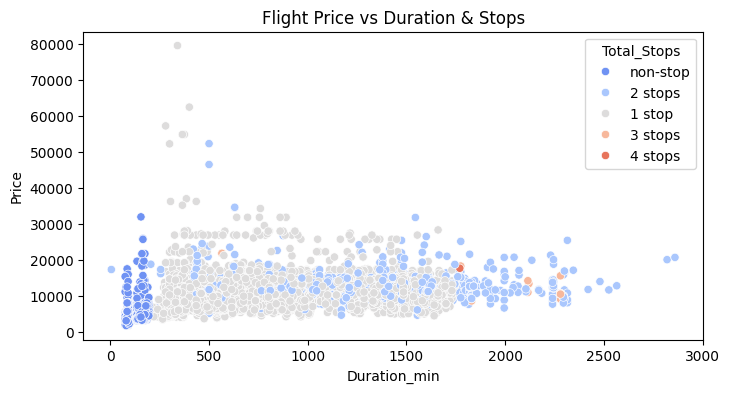

In [43]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=flight_predic_data, x="Duration_min", y="Price", hue="Total_Stops", palette="coolwarm")
plt.title("Flight Price vs Duration & Stops")
plt.show()

# Flight Price vs Duration & Stops

## What is this Graph?
This scatter plot shows the **relationship between flight duration (in minutes) and flight price**, categorized by the **number of stops**.

## Key Observations

### **Non-stop Flights (Blue)**
- Mostly **clustered at lower durations (~0-500 min)**.
- Prices **vary widely**, but many **are cheaper** than flights with stops.

### **1-stop Flights (Gray)**
- Spread across a **wide range of durations** (200–2500 min).
- Prices are **more scattered** but generally fall within **10,000–30,000**.

### **2+ Stop Flights (Orange/Red)**
- **Rare and scattered**, mostly **longer durations (~1000+ min)**.
- Some **high-priced flights (~50,000–80,000)** with **long durations**.

## **Conclusion**
- **Shorter flights (non-stop) tend to be cheaper.**
- **Flights with stops tend to have longer durations** and **can be more expensive**.
- **Outliers** exist—some flights are unusually expensive regardless of duration.


## Encoding Categorical Features

### Why Do We Need Encoding?
- Our dataset has **words (categories)** like **Airline, Source, Destination, and Stops**.
- **Machines can’t understand words**, so we need to **convert them into numbers**.

---

### Types of Encoding
There are **two main ways** to change words into numbers:

**Label Encoding** – Used when categories have a natural order.  
   - Example: **Seat Class (Economy < Business < First Class)**  
   - Converts:  
     - `Economy → 0`  
     - `Business → 1`  
     - `First Class → 2`  

**One-Hot Encoding** – Used when categories have **no order**.  
   - Example: **Cities (Delhi, Mumbai, Bangalore)**  
   - Converts:  
     ```
     Delhi     → [1, 0, 0]  
     Mumbai    → [0, 1, 0]  
     Bangalore → [0, 0, 1]  
     ```

---

### Encoding Our Flight Data
| Feature | Type of Encoding |
|---------|-----------------|
| **Airline** | One-Hot Encoding |
| **Source** | One-Hot Encoding |
| **Destination** | One-Hot Encoding |
| **Total Stops** | **Label Encoding (Preferred)** or One-Hot Encoding |

In [44]:
flight_predic_data = pd.get_dummies(flight_predic_data, columns= ['Airline', 'Source', 'Destination'], dtype = 'int', drop_first= True)
flight_predic_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,non-stop,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2 stops,7662,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1 stop,6218,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Encoding `Total_Stops`
- Since `Total_Stops` follows a natural order (`non-stop < 1 stop < 2 stops < 3 stops < 4 stops`), we use **Ordinal Encoding (Mapping)**:


In [45]:
flight_predic_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [46]:
# Ordinal Encoding.

stops_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

flight_predic_data['Total_Stops'] = flight_predic_data['Total_Stops'].map(stops_mapping)

In [47]:
flight_predic_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# **Step-by-Step Approach for Feature Selection**

In [48]:
flight_predic_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [49]:
X = flight_predic_data.drop('Price', axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
y = flight_predic_data.drop('Price', axis = 1)
y.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


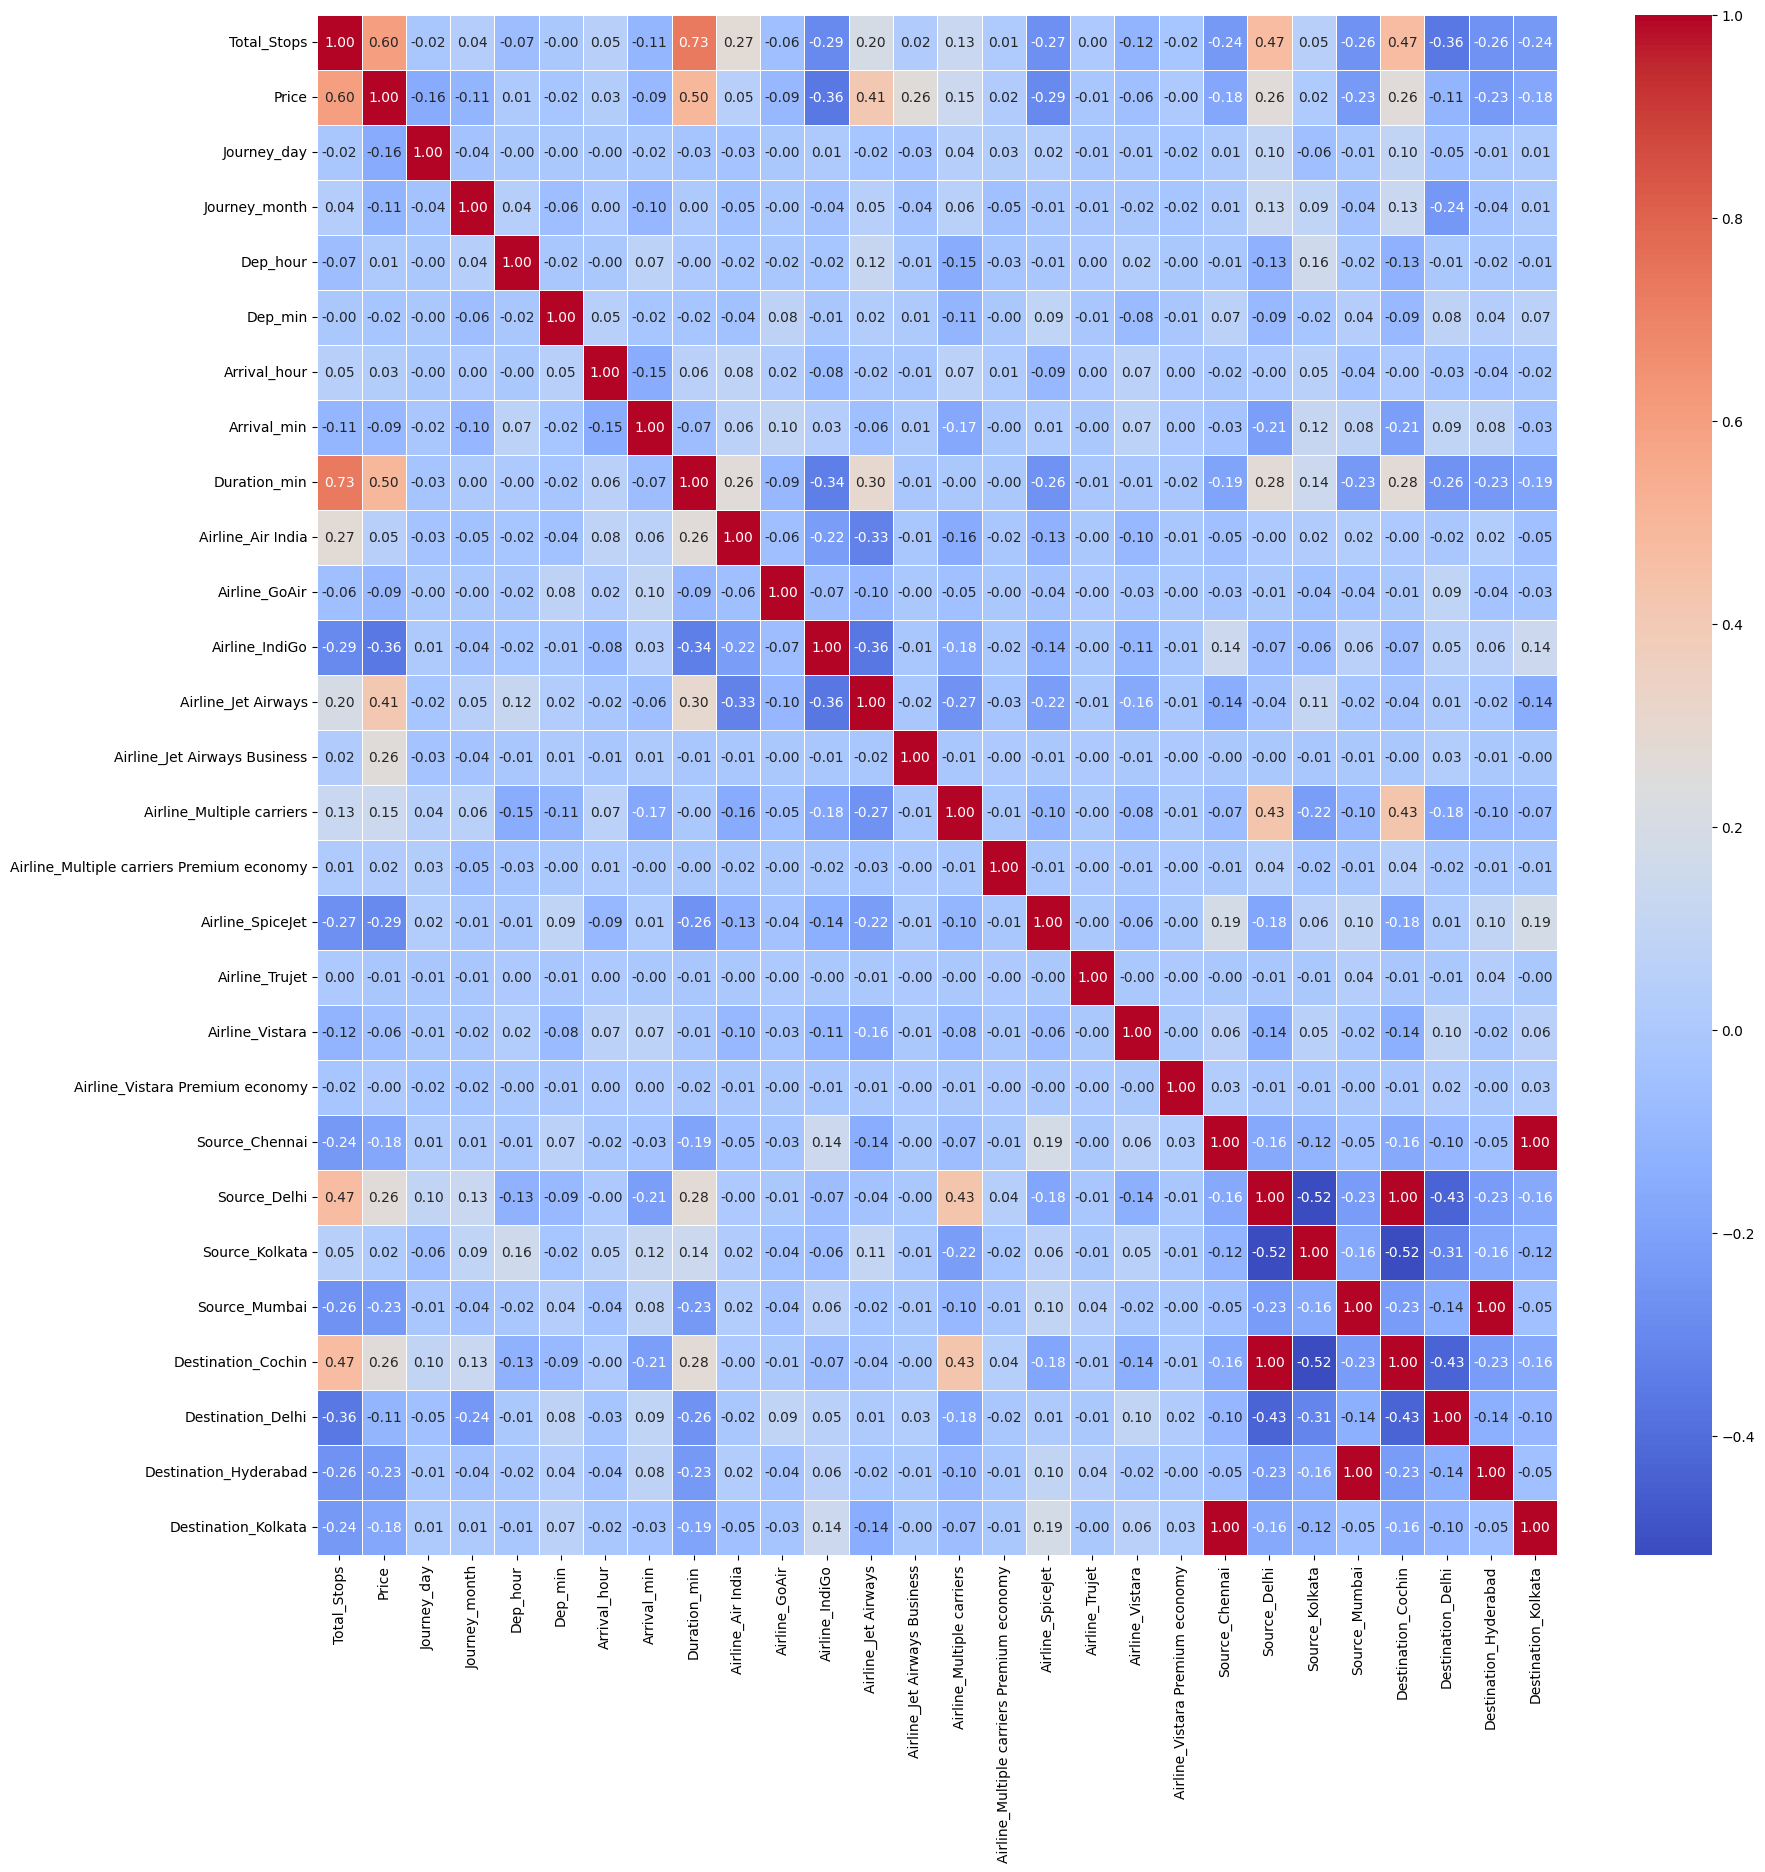

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(flight_predic_data.corr(),cmap='coolwarm',annot=True, fmt=".2f",linewidths=0.5)
plt.show()

In [52]:
from sklearn.ensemble import ExtraTreesRegressor

# Feature Importance with ExtraTreesRegressor
reg = ExtraTreesRegressor()
reg.fit(X,y)

print(reg.feature_importances_)

[1.43753243e-01 2.71986270e-04 1.56961863e-04 9.44059937e-04
 1.35995679e-03 9.89368863e-04 9.64216579e-04 8.09901405e-01
 3.73787948e-03 3.57595800e-05 1.77661527e-02 4.39612641e-03
 8.30812800e-08 6.01142307e-03 1.56641899e-07 2.46181649e-03
 4.38668465e-07 4.37836997e-04 2.55971637e-09 2.48190471e-05
 1.85808888e-03 3.95116758e-04 5.22223336e-04 2.73686081e-03
 7.31459893e-04 5.23234234e-04 1.93237583e-05]


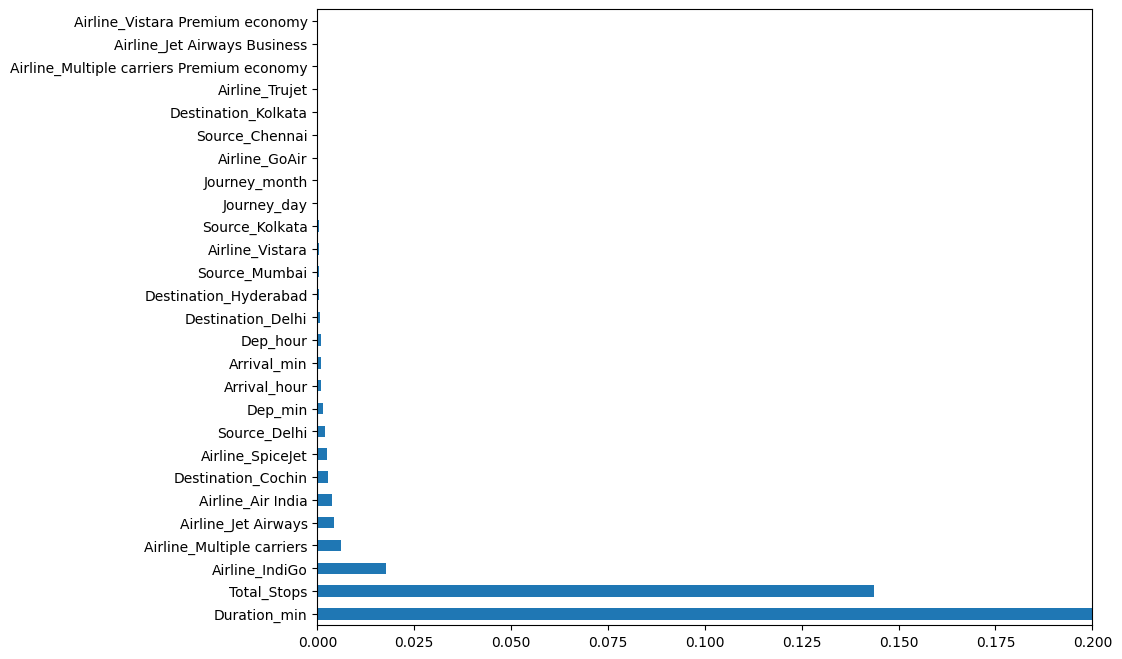

In [53]:
#plot graph of feature importances for better visualization

plt.figure(figsize=(10, 8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.xlim(0.00, 0.20)
plt.show()

# Feature Selection for Flight Price Prediction

**Goal:**  
To identify the most important features that impact flight ticket prices while eliminating redundant or low-impact ones.  

 **Steps to Follow:**  

1️ **Recursive Feature Elimination (RFE) **  
- Iteratively removes the least important features based on model performance.  

2️ **Tree-Based Feature Importance **  
- Uses a Random Forest model to rank feature importance.  

**Why Feature Selection?**  
Improves model accuracy 
Reduces overfitting 
Enhances interpretability

By selecting the most relevant features, we build a **better, faster, and more accurate** flight price prediction model!  

In [54]:
# Define features and target variable
X = flight_predic_data.drop(columns=['Price'])  # Assuming 'Price' is the target variable
y = flight_predic_data['Price']

In [55]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Initialize model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [57]:
# Step 1: Apply Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe = RFE(rf, n_features_to_select=15)  # Selecting top 15 features
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=15)

In [58]:
# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features (RFE):", selected_features.tolist())

Selected Features (RFE): ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_min', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Delhi']


In [59]:

# Step 2: Feature Importance using Random Forest
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

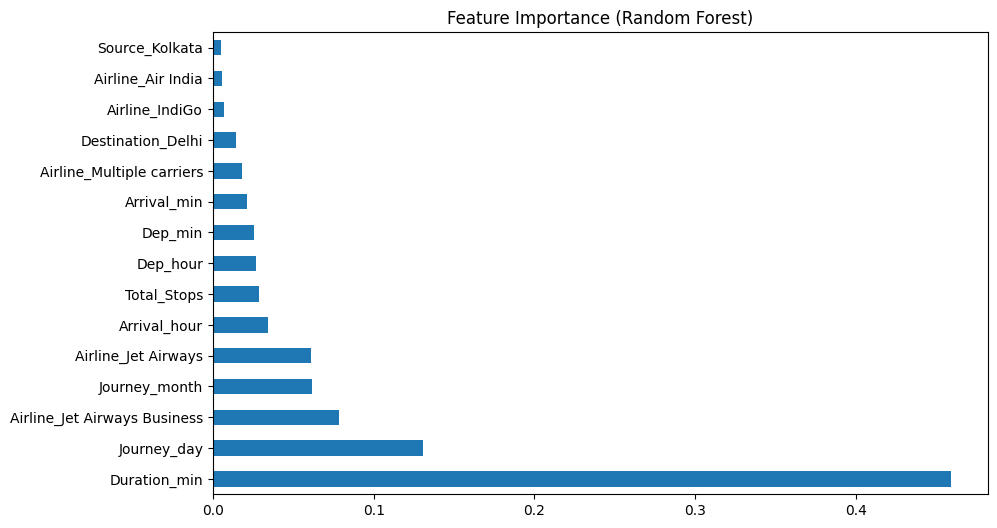

In [60]:
# Plot feature importance
plt.figure(figsize=(10,6))
feature_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()

# **Split Data into Train & Test Sets**

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Train Regression Models.**

*we will go with RandomForestRegressor(it works well with medium to large datasets with non linear relationship; and reduces overfitting)*


*And XGBRegressor(best for complex non-linear problems)*

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {type(model).__name__}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 50) # Separator between r2 and r squared values for each model instance in the dataset 
    return y_pred


In [65]:
# Train and evaluate together Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

Model: RandomForestRegressor
Mean Absolute Error (MAE): 1163.59
Mean Squared Error (MSE): 3781220.04
Root Mean Squared Error (RMSE): 1944.54
R² Score: 0.8186
--------------------------------------------------


In [66]:
# Train and evaluate together XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

Model: XGBRegressor
Mean Absolute Error (MAE): 1248.72
Mean Squared Error (MSE): 3593999.75
Root Mean Squared Error (RMSE): 1895.78
R² Score: 0.8276
--------------------------------------------------


C:\Users\Gupta ji\AppData\Local\Temp\ipykernel_17584\1872844144.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette="coolwarm")


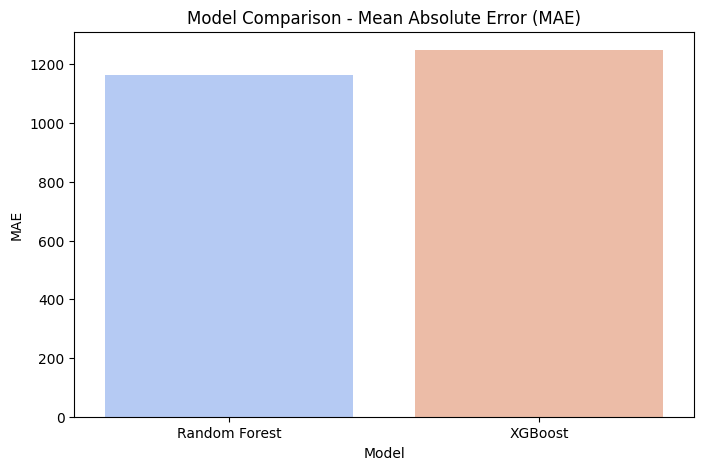

In [67]:

# Visualizing Model Performance

models = ["Random Forest", "XGBoost"]
mae_values = [mean_absolute_error(y_test, y_pred_rf),
              mean_absolute_error(y_test, y_pred_xgb)]


plt.figure(figsize=(8,5))
sns.barplot(x=models, y=mae_values, palette="coolwarm")
plt.title("Model Comparison - Mean Absolute Error (MAE)")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.show()

# Flight Price Prediction - Model Comparison

## Objective
The goal is to compare different machine learning models and select the best one for **predicting flight ticket prices**. The models tested are:

**Random Forest Regressor**  
**XGBoost Regressor**  

---

## Model Performance Metrics

| Metric | RandomForestRegressor | XGBRegressor | Best Model |
|---------|----------------------|-------------|------------|
| **MAE** (Mean Absolute Error) | **1163.59** | 1248.72 |  Random Forest |
| **MSE** (Mean Squared Error) | 3,781,220.04 | **3,593,999.75** | XGBoost |
| **RMSE** (Root Mean Squared Error) | 1,944.54 | **1,895.78** | XGBoost |
| **R² Score** (Coefficient of Determination) | 0.8186 | **0.8276** | XGBoost |

---

## Graphical Representation

From the graph, we can see that **Random Forest has a lower MAE** than XGBoost. However, MAE alone is not enough to make the final decision.

---

## Conclusion: Which Model is Better?
- **XGBoost outperforms Random Forest** in terms of **MSE, RMSE, and R² Score**.
- **Random Forest has a slightly lower MAE**, meaning it makes fewer absolute errors.
- Since **XGBoost has a better R² Score (0.8276 vs. 0.8186) and a lower RMSE**, it **better explains variance** and **generalizes well**.

### **Final Decision: Use XGBoost for Deployment!** 



#  Hyperparameter Tuning for XGBoost

In [69]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [70]:
# Initialize XGBoost model
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [71]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [72]:
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations
    scoring='neg_mean_absolute_error',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

In [73]:
# Fit model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [74]:
# Best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [75]:
# Training final model with best parameters

best_xgb = random_search.best_estimator_

**Comparing performances (Checking if XGBoost improves after tuning.)**
**Feature Importance Analysis( (SHAP or built-in feature importance).)**

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import shap

c:\Flight_Price_Prediction\FL_PR_PRE\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Make predictions

y_pred = best_xgb.predict(X_test)

In [78]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [79]:
# Print results
print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


XGBoost Model Performance:
Mean Absolute Error (MAE): 1106.32
Mean Squared Error (MSE): 3485141.75
Root Mean Squared Error (RMSE): 1866.85
R² Score: 0.8328


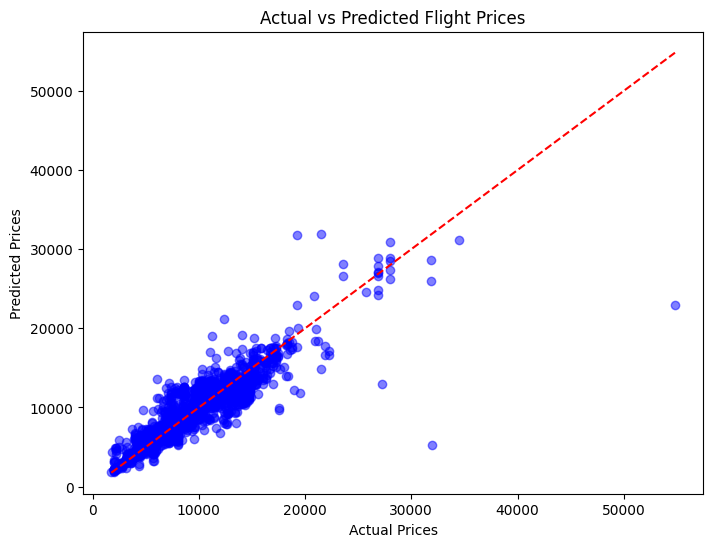

In [80]:
# Visualization: Actual vs Predicted

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Flight Prices")
plt.show()

## **Actual vs. Predicted Flight Prices Analysis**  

### **Key Insights:**  
- Strong **positive correlation** between actual and predicted prices.  
- Most predictions align with the **red diagonal line** (ideal scenario).  
- Model performs **better for lower-priced flights**, while variance increases for higher prices. 

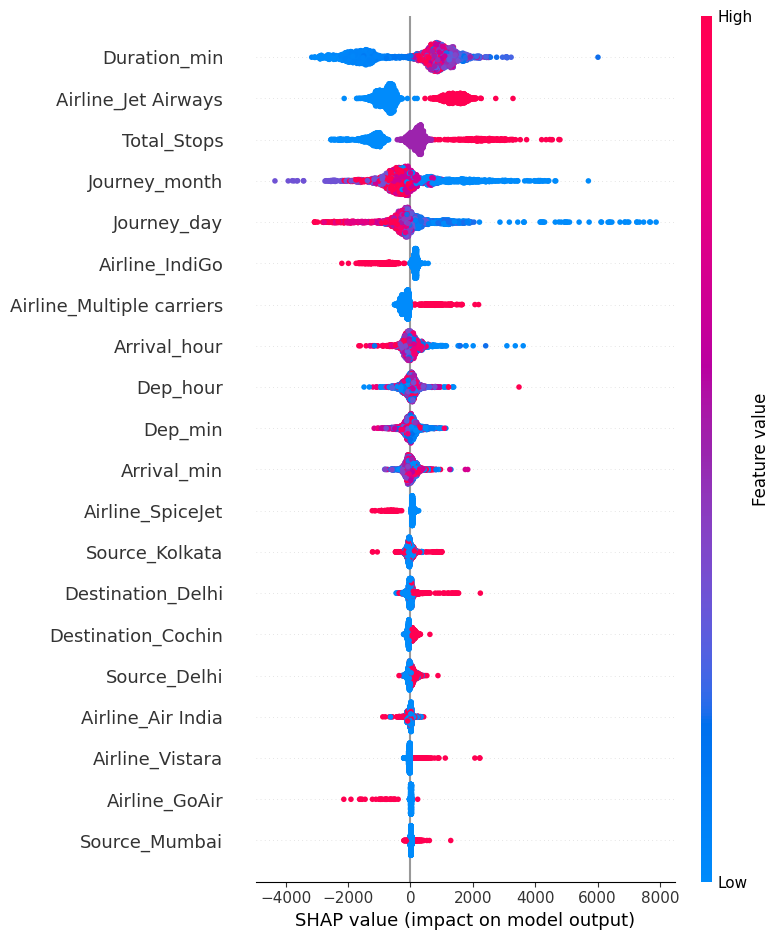

In [81]:
# Feature Importance using SHAP

explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

### Conclusions from SHAP Value Analysis

1. **Key Influencers on Model Predictions**  
   - Features such as `Airline_Jet Airways`, `Total_Stops`, and `Journey_month` are the most influential in determining the model's output.  
   - This indicates that the choice of airline, number of stops, and timing of the journey significantly impact the predictions.

2. **Varied Impact of Features**  
   - The impact of certain features, like `Airline_Jet Airways`, varies widely, suggesting their effect depends on other factors or specific conditions.  
   - This highlights the complexity and interaction of variables within the model.

3. **Less Influential Features**  
   - Features such as `Source_Mumbai` and `Arrival_min` have a narrower range of SHAP values, indicating a smaller impact on predictions.  
   - This suggests that departure/arrival locations and specific minutes have less influence compared to other factors like airline and journey timing.

In [82]:
# let's save the model

import joblib

joblib.dump(best_xgb, "flight_price_prediction_model.joblib")

['flight_price_prediction_model.joblib']

# ML Flow

In [83]:
import mlflow

In [92]:

# Set MLflow experiment name
mlflow.set_experiment("Flight Price Prediction")

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    with mlflow.start_run():
        # Train model
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Compute evaluation metrics
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)

        # Log parameters & metrics in MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)

        # Log model
        mlflow.sklearn.log_model(model, model_name)

        print(f"{model_name} logged in MLflow: RMSE={rmse:.2f}, R2={r2:.4f}")

# Example usage (Random Forest and XGBoost)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, gamma=0.2, subsample=0.8, colsample_bytree=1.0, random_state=42)

evaluate_model(rf_model, X_train, X_test, y_train, y_test, "RandomForestRegressor")
evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBRegressor")


2025/03/20 13:29:34 INFO mlflow.tracking.fluent: Experiment with name 'Flight Price Prediction' does not exist. Creating a new experiment.
2025/03/20 13:29:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForestRegressor logged in MLflow: RMSE=1890.11, R2=0.8287


2025/03/20 13:30:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBRegressor logged in MLflow: RMSE=1898.11, R2=0.8272


In [93]:
import mlflow
import mlflow.sklearn

# Load the trained model
model_uri = "runs:/204d6cc276de4fae8f4e1e1a75898646/XGBRegressor"
model = mlflow.sklearn.load_model(model_uri)

# Get feature names from the model
feature_names = model.feature_names_in_
print("Features used for prediction:", feature_names)


Features used for prediction: ['Total_Stops' 'Journey_day' 'Journey_month' 'Dep_hour' 'Dep_min'
 'Arrival_hour' 'Arrival_min' 'Duration_min' 'Airline_Air India'
 'Airline_GoAir' 'Airline_IndiGo' 'Airline_Jet Airways'
 'Airline_Jet Airways Business' 'Airline_Multiple carriers'
 'Airline_Multiple carriers Premium economy' 'Airline_SpiceJet'
 'Airline_Trujet' 'Airline_Vistara' 'Airline_Vistara Premium economy'
 'Source_Chennai' 'Source_Delhi' 'Source_Kolkata' 'Source_Mumbai'
 'Destination_Cochin' 'Destination_Delhi' 'Destination_Hyderabad'
 'Destination_Kolkata']
